In [59]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile

import json
import requests

from graph_utils import *

%matplotlib inline
# TODO: Run Graph in persitent session using flask
# Read test.zip
# Api request return Softmax outputs
# Write response to submission.csv

In [26]:
req_image_size = 299

In [41]:
img_bgr = cv2.imread('data/dog.jpg')  #BGR Image
# img_bgr = cv2.imread('../data/test1.png')  #BGR Image
b, g, r = cv2.split(img_bgr)  # get b,g,r
img_rgb = cv2.merge([r, g, b])  # switch it to rgb
# img_rgb = img_rgb/255

img_resized = cv2.resize(img_rgb, (req_image_size, req_image_size))

img = np.array([img_resized])
print(img.shape, type(img))



(1, 299, 299, 3) <class 'numpy.ndarray'>


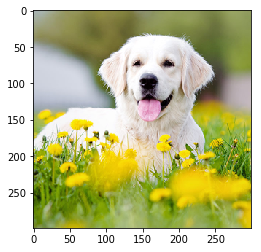

In [37]:
plt.imshow(img[0])

In [52]:
c = requests.post('http://127.0.0.1:8000/api/breeds', json=img.tolist())

data = json.loads(c.text)['y']
print(data, type(data))

[[0.005038968753069639, 0.007152852602303028, 0.020938588306307793, 0.004655320197343826, 0.00532689830288291, 0.007828830741345882, 0.007551155053079128, 0.005260308273136616, 0.021116850897669792, 0.009831372648477554, 0.005729293450713158, 0.0070276944898068905, 0.008084188215434551, 0.00818615686148405, 0.009988685138523579, 0.010031848214566708, 0.008929860778152943, 0.004011963028460741, 0.01177362259477377, 0.010922303423285484, 0.005148999858647585, 0.006398312281817198, 0.005841086618602276, 0.0072855339385569096, 0.009645292535424232, 0.006057932041585445, 0.005936075933277607, 0.005362808704376221, 0.004346050322055817, 0.018785052001476288, 0.008386577479541302, 0.014639446511864662, 0.007126632146537304, 0.01371799036860466, 0.011284852400422096, 0.006371938157826662, 0.017414439469575882, 0.010532190091907978, 0.009117865934967995, 0.011043374426662922, 0.0081474669277668, 0.007906747050583363, 0.010527650825679302, 0.011317042633891106, 0.006861027795821428, 0.0063827089

In [60]:
Y_sample = pd.read_csv(ZipFile('data/sample_submission.csv.zip', 'r').open('sample_submission.csv'), index_col=0)